# Mental Health in the Tech Industry Analysis

## Imports

pd.read_sql('''

''', conn)

## Sources and Links
Kaggle dataset : [Mental Health in the Tech Industry](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry)

Website used to create ERD : [dbdiagram.io](https://dbdiagram.io)

---
# Overview

- title

- sources and links

- overview

- imports

- business understanding

- data understanding

- methodoligy

- functions

- exploritory data analisys

# Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from pandasql import sqldf

---
# Business understanding

---
# Data Understanding

---
# Methodoligy

---
# Functions

In [28]:
def normalize_gender(gender):
    g = gender.lower().strip()
    if g in ['male', 'man', 'cis male', 'cis man', 'masculine']:
        return 'male'
    elif g in ['female', 'f', 'woman', 'cis female', 'cis woman', 'femanine']:
        return 'female'
    elif 'trans' in g:
        return 'trans'
    elif 'non-binary' in g or 'genderqueer' in g or 'genderfluid' in g:
        return 'non-binary'
    elif g in ['na', 'n/a', '', 'none', 'no']:
        return 'prefer not to say'
    else:
        return 'other'

---
# Exploritory Data Analisys

In [2]:
conn = sqlite3.connect('mental_health.sqlite')

In [3]:
tables_query = "select name from sqlite_master where type = 'table';"
tables = pd.read_sql(tables_query, conn)
tables

,name
0,Answer
1,Question
2,Survey


Here we have an `Entity Relationship Diagram` or `ERD` for short. This is a visual representation of how the tables in our SQL file are connected. Link above in the _sources and links_ section.

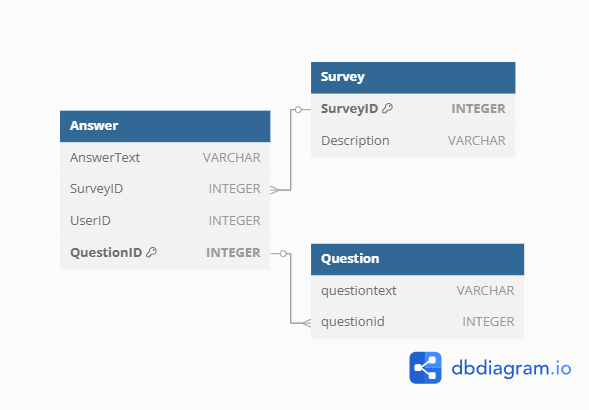

# Exploritory Data Analysis

In [4]:
pd.read_sql('''
select *
from Question;
''', conn)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [5]:
pd.read_sql('''
select *
from Answer;
''', conn)

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [6]:
pd.read_sql('''
select *
from Survey;
''', conn)

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [7]:
pd.read_sql('''
select answertext as answer, count(*) as count
from answer as a
left join question as q
on a.questionid = q.questionid
where questiontext = 'What is your gender?'
group by a.answertext
order by count desc
''',conn)

,answer,count
0,Male,2830
1,Female,914
2,male,212
3,female,110
4,-1,24
...,...,...
96,Agender/genderfluid,1
97,Agender trans woman,1
98,AFAB,1
99,A little about you,1


In [8]:
pd.read_sql('''
select description
from survey
''',conn)

,Description
0,mental health survey for 2014
1,mental health survey for 2016
2,mental health survey for 2017
3,mental health survey for 2018
4,mental health survey for 2019


# Data Insight and Analysis

- Whats the age spread and gender breakdown

- what jobs and industries are represented in the data

## Age Spread

In [9]:
pd.read_sql('''
select answertext, count(answertext) as count
from Question as q
left join Answer as a
on q.questionid = a.questionid
where questiontext = 'What is your gender?'
group by answertext
''', conn)

,AnswerText,count
0,-1,24
1,43,1
2,A little about you,1
3,AFAB,1
4,Agender,4
...,...,...
96,something kinda male?,1
97,sometimes,1
98,trans woman,1
99,transgender,1


In [10]:
df_age_spread = pd.read_sql('''
select answertext, count(answertext) as count
from Question as q
left join Answer as a
on q.questionid = a.questionid
where questiontext = 'What is your gender?'
group by answertext
''', conn)

In [16]:
with pd.option_context('display.max_rows', None):
    print(df_age_spread['AnswerText'].value_counts())

AnswerText
-1                                                1
Transitioned, M2F                                 1
gender non-conforming woman                       1
fm                                                1
fluid                                             1
femmina                                           1
female-bodied; no feelings about gender           1
female                                            1
agender                                           1
\-                                                1
Woman-identified                                  1
Unicorn                                           1
Transgender woman                                 1
Other                                             1
Transfeminine                                     1
Trans-female                                      1
Trans woman                                       1
Trans non-binary/genderfluid                      1
Trans man                                         1
T

In [29]:
df_age_spread['gender'] = df_age_spread['AnswerText'].apply(normalize_gender)

In [30]:
df_age_spread['gender'].value_counts()

gender
other                64
non-binary           15
trans                14
male                  4
female                2
prefer not to say     2
Name: count, dtype: int64

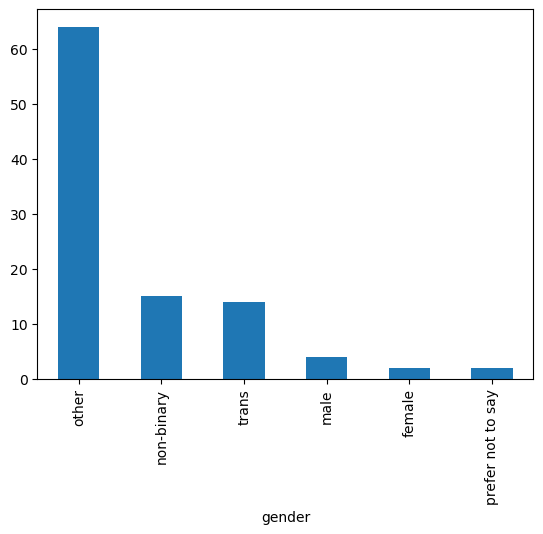

In [39]:
df_age_spread['gender'].value_counts().plot(kind = 'bar')
plt.show();